In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [0]:
filepath = "/content/drive/My Drive/House prices/train.csv"

In [0]:
train_df = pd.read_csv(filepath)
test_df = pd.read_csv('/content/drive/My Drive/House prices/test.csv')

In [5]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [0]:
#Save the 'Id' column
train_ID = train_df['Id']
test_ID = test_df['Id']

#Droping the  'Id' colum since it's unnecessary for  the prediction process.
train_df.drop("Id", axis = 1, inplace = True)
test_df.drop("Id", axis = 1, inplace = True)

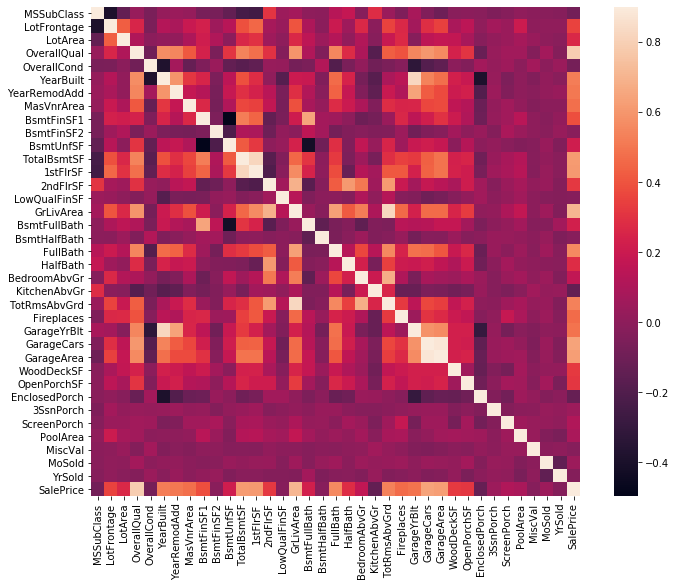

In [7]:
# Plot the Correlation map to see how features are correlated with target: SalePrice
corr_matrix = train_df.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corr_matrix, vmax=0.9, square=True)

### **White squares indicate high correlation between variables.**

**'OverallQual'** has a *high* correlation with **‘SalePrice’**.

**‘GarageCars’** and **‘GarageArea’** show *high* correlation and both have a *high* correlation with **‘SalePrice’**.

**‘TotalBsmtSF’** and **‘1stFlrSF’** show *high* correlation and have a *high* correlation with **‘SalePrice’**.

**'YearBuilt'** and **'GarageYrBlt'** show *high* correlation and have a *high* correlation with **‘SalePrice’**.

**'GrLivArea'** and **'TotRmsAbvGrd'** show *high* correlation with **‘SalePrice’**.

**'FullBath'** has a *high* correlation with **‘SalePrice’**.

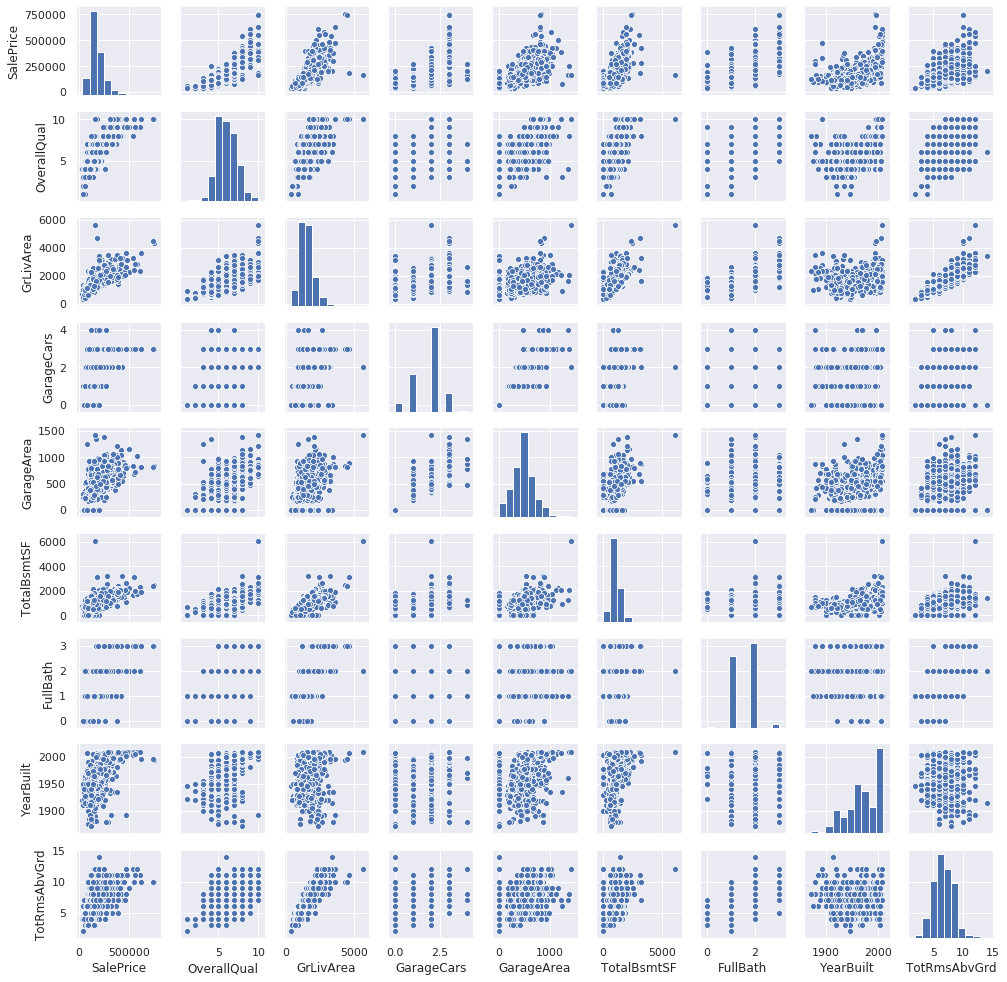

In [8]:
#scatterplot for columns above
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars','GarageArea' ,'TotalBsmtSF', 'FullBath', 'YearBuilt','TotRmsAbvGrd']
sns.pairplot(train_df[cols], height = 1.5)
plt.show();

**‘GrLivArea’** and **‘TotRmsAbvGrd’** show a *high* linear relationship.

**'SalePrice'** and **'YearBuilt'** show a *relatively high* linear relationship.

**'GrLivArea'** restricts the **'TotalBsmtSF'** as the basement will rarely be larger than the entire ground floor.

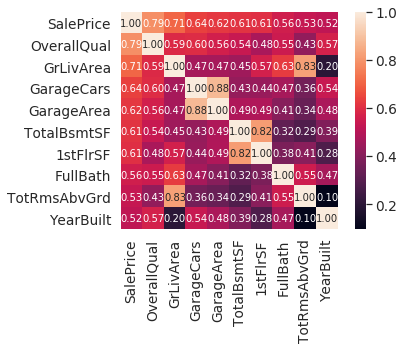

In [9]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corr_matrix.nlargest(k, 'SalePrice')['SalePrice'].index
import numpy as np
cm = np.corrcoef(train_df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

**\+ 'OverallQual'**

**\+ 'GarageCars'**

\- 'GarageArea'

**\+ 'TotalBsmtSF'**

\- '1stFlrSF'

**\+ 'YearBuilt'**

\- 'GarageYrBlt'

**\+ 'GrLivArea'**

\- 'TotRmsAbvGrd'

**\+ 'FullBath'**

### **Final list of included variables**

These variables have clostest variance to ‘SalePrice’

*   'OverallQual'
*   'GarageCars'
*   'TotalBsmtSF'
*   'YearBuilt'
*   'GrLivArea'
*   'FullBath'

## **Checking for Outliers**

In [0]:
n_rows_1 = train_df.shape[0]

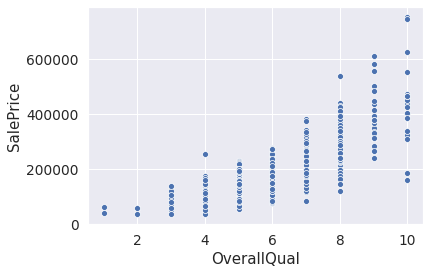

In [11]:
sns.scatterplot(x=train_df['OverallQual'], y=train_df['SalePrice'])

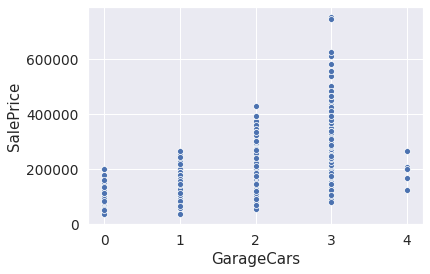

In [12]:
sns.scatterplot(x=train_df['GarageCars'], y=train_df['SalePrice'])

In [0]:
train_df = train_df.drop(train_df[(train_df['GarageCars']==3) & (train_df['SalePrice']>650000)].index)

Removing outliers with 'GarageCars' equal to 3 and 'SalePrice' bigger than 650,000

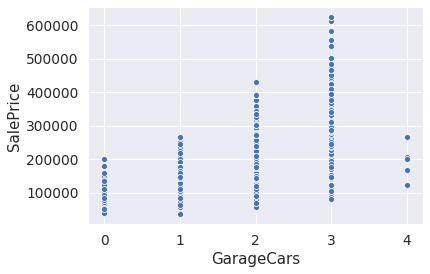

In [14]:
sns.scatterplot(x=train_df['GarageCars'], y=train_df['SalePrice'])

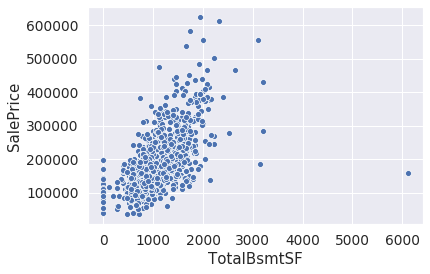

In [15]:
sns.scatterplot(x=train_df['TotalBsmtSF'], y=train_df['SalePrice'])

In [0]:
train_df = train_df.drop(train_df[train_df['TotalBsmtSF']>3000].index)

Removing outliers with 'TotalBsmtSF' bigger than 3,000

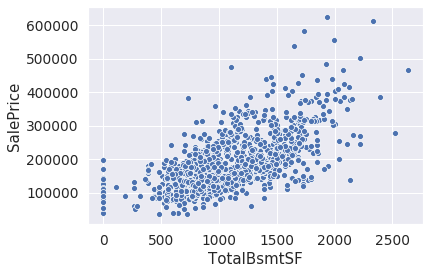

In [17]:
sns.scatterplot(x=train_df['TotalBsmtSF'], y=train_df['SalePrice'])

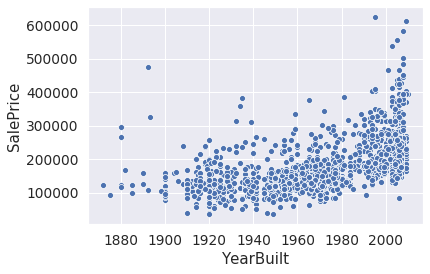

In [18]:
sns.scatterplot(x=train_df['YearBuilt'], y=train_df['SalePrice'])

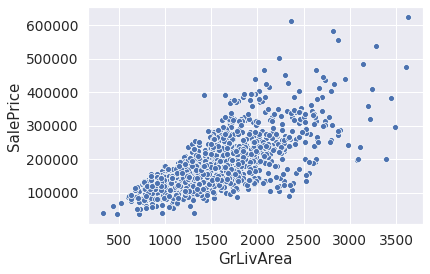

In [19]:
sns.scatterplot(x=train_df['GrLivArea'], y=train_df['SalePrice'])

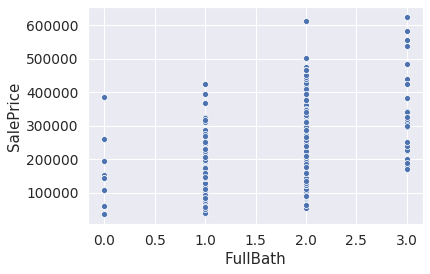

In [20]:
sns.scatterplot(x=train_df['FullBath'], y=train_df['SalePrice'])

In [21]:
print("Number of outliers:", (n_rows_1 - train_df.shape[0]))

Number of outliers: 7


## **Transforming Target Variable**

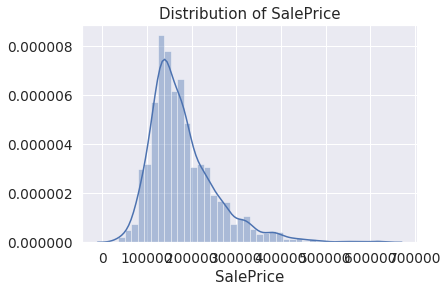

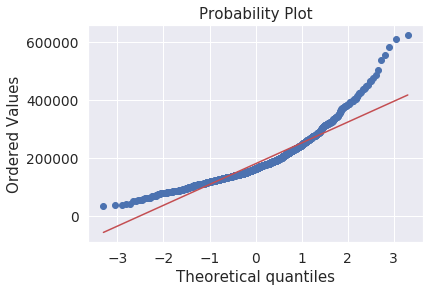

In [22]:
#distribution plot - histogram
sns.distplot(train_df['SalePrice']).set_title("Distribution of SalePrice")

# probability plot
fig = plt.figure()
from scipy import stats
res = stats.probplot(train_df['SalePrice'], plot=plt)

The histogram plot has a positive skewness which is not a normal distribution.

In the Probability plot, the ordered values of ‘SalePrice’ do not follow the linear trend.

Log transformation should convert make the data normally distributed.


 mean = 12.02 and std dev = 0.39



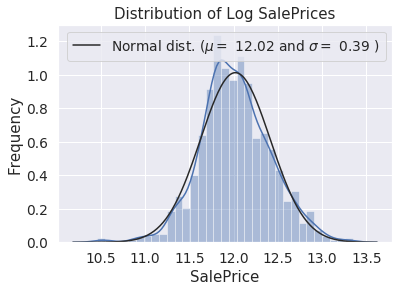

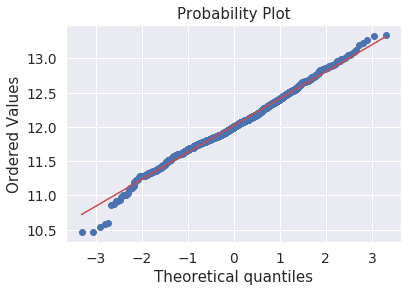

In [23]:
#Using the log1p function applies log(1+x) to all elements of the column
train_df["SalePrice"] = np.log1p(train_df["SalePrice"])

#Check the new distribution after log transformation 
from scipy.stats import norm
sns.distplot(train_df['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train_df['SalePrice'])
print( '\n mean = {:.2f} and std dev = {:.2f}\n'.format(mu, sigma))

#NPlotting the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Distribution of Log SalePrices')

#Also the QQ plot
fig = plt.figure()
res = stats.probplot(train_df['SalePrice'], plot=plt)
plt.show()

## **Missing Values**

In [24]:
#concatenating the train and test data in the same dataframe so that it would be more efficient to work on missing values
ntrain = train_df.shape[0]
ntest = test_df.shape[0]
y_train = train_df.SalePrice.values
all_data = pd.concat((train_df, test_df)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


In [25]:
orig_all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
orig_all_data_na = orig_all_data_na.drop(orig_all_data_na[orig_all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Percentage' :orig_all_data_na})
missing_data

,Missing Percentage
PoolQC,99.725275
MiscFeature,96.394231
Alley,93.200549
Fence,80.425824
FireplaceQu,48.763736
LotFrontage,16.655220
GarageQual,5.460165
GarageCond,5.460165
GarageFinish,5.460165
GarageYrBlt,5.460165


In [0]:
irrelevent = ['GarageYrBlt','TotRmsAbvGrd','Utilities'] # will remove 1stFlrSF and GarageArea later-- after creating additional features
all_data.drop(irrelevent,axis=1, inplace=True)

Removing 2 of the columns, decided to be irrelevant in predicting 'SalePrice'

In [0]:
# replace 'NaN' with 'None' in these columns
for x in ['PoolQC','MiscFeature','Alley','Fence','MasVnrType','FireplaceQu','GarageQual','GarageCond','GarageFinish','GarageType','BsmtExposure','BsmtCond','BsmtQual','BsmtFinType1','BsmtFinType2']:
    all_data[x].fillna('None',inplace=True)

# replacing missing values when there is no basement, with 0
all_data.MasVnrArea.fillna(0,inplace=True)
all_data.BsmtFullBath.fillna(0,inplace=True)
all_data.BsmtHalfBath.fillna(0,inplace=True)
all_data.BsmtFinSF1.fillna(0,inplace=True)
all_data.BsmtFinSF2.fillna(0,inplace=True)
all_data.BsmtUnfSF.fillna(0,inplace=True)
all_data.TotalBsmtSF.fillna(0,inplace=True)

# replacing missing values when there is no garage, with 0
all_data.GarageCars.fillna(0,inplace=True)
all_data.GarageArea.fillna(0,inplace=True)

#Functional data description says NA means typical
all_data["Functional"] = all_data["Functional"].fillna("Typ")

Replaced the missing data which should have contained 0 but were left blank

Remaining missing data:

In [28]:
rem_all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
rem_all_data_na = rem_all_data_na.drop(rem_all_data_na[rem_all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Percentage' :rem_all_data_na})
missing_data

,Missing Percentage
LotFrontage,16.655220
MSZoning,0.137363
SaleType,0.034341
KitchenQual,0.034341
Exterior2nd,0.034341
Exterior1st,0.034341
Electrical,0.034341


In [29]:
all_data

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fence,FireplaceQu,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscFeature,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,PoolQC,RoofMatl,RoofStyle,SaleCondition,SaleType,ScreenPorch,Street,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,None,3,1Fam,TA,No,706.0,0.0,GLQ,Unf,1.0,0.0,Gd,150.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,None,None,0,PConc,2,Typ,548.0,2.0,TA,RFn,TA,Attchd,1710,1,GasA,Ex,2Story,1,Gd,Lvl,Gtl,8450,Inside,65.0,Reg,0,60,RL,196.0,BrkFace,None,0,2,CollgCr,61,5,7,Y,0,None,CompShg,Gable,Normal,WD,0,Pave,856.0,0,2003,2003,2008
1,1262,0,0,None,3,1Fam,TA,Gd,978.0,0.0,ALQ,Unf,0.0,1.0,Gd,284.0,Y,Feedr,Norm,SBrkr,0,TA,TA,MetalSd,MetalSd,None,TA,1,CBlock,2,Typ,460.0,2.0,TA,RFn,TA,Attchd,1262,0,GasA,Ex,1Story,1,TA,Lvl,Gtl,9600,FR2,80.0,Reg,0,20,RL,0.0,None,None,0,5,Veenker,0,8,6,Y,0,None,CompShg,Gable,Normal,WD,0,Pave,1262.0,298,1976,1976,2007
2,920,866,0,None,3,1Fam,TA,Mn,486.0,0.0,GLQ,Unf,1.0,0.0,Gd,434.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,None,TA,1,PConc,2,Typ,608.0,2.0,TA,RFn,TA,Attchd,1786,1,GasA,Ex,2Story,1,Gd,Lvl,Gtl,11250,Inside,68.0,IR1,0,60,RL,162.0,BrkFace,None,0,9,CollgCr,42,5,7,Y,0,None,CompShg,Gable,Normal,WD,0,Pave,920.0,0,2001,2002,2008
3,961,756,0,None,3,1Fam,Gd,No,216.0,0.0,ALQ,Unf,1.0,0.0,TA,540.0,Y,Norm,Norm,SBrkr,272,TA,TA,Wd Sdng,Wd Shng,None,Gd,1,BrkTil,1,Typ,642.0,3.0,TA,Unf,TA,Detchd,1717,0,GasA,Gd,2Story,1,Gd,Lvl,Gtl,9550,Corner,60.0,IR1,0,70,RL,0.0,None,None,0,2,Crawfor,35,5,7,Y,0,None,CompShg,Gable,Abnorml,WD,0,Pave,756.0,0,1915,1970,2006
4,1145,1053,0,None,4,1Fam,TA,Av,655.0,0.0,GLQ,Unf,1.0,0.0,Gd,490.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,None,TA,1,PConc,2,Typ,836.0,3.0,TA,RFn,TA,Attchd,2198,1,GasA,Ex,2Story,1,Gd,Lvl,Gtl,14260,FR2,84.0,IR1,0,60,RL,350.0,BrkFace,None,0,12,NoRidge,84,5,8,Y,0,None,CompShg,Gable,Normal,WD,0,Pave,1145.0,192,2000,2000,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2907,546,546,0,None,3,Twnhs,TA,No,0.0,0.0,Unf,Unf,0.0,0.0,TA,546.0,Y,Norm,Norm,SBrkr,0,TA,TA,CemntBd,CmentBd,None,None,0,CBlock,1,Typ,0.0,0.0,None,None,None,None,1092,1,GasA,Gd,2Story,1,TA,Lvl,Gtl,1936,Inside,21.0,Reg,0,160,RM,0.0,None,None,0,6,MeadowV,0,7,4,Y,0,None,CompShg,Gable,Normal,WD,0,Pave,546.0,0,1970,1970,2006
2908,546,546,0,None,3,TwnhsE,TA,No,252.0,0.0,Rec,Unf,0.0,0.0,TA,294.0,Y,Norm,Norm,SBrkr,0,TA,TA,CemntBd,CmentBd,None,None,0,CBlock,1,Typ,286.0,1.0,TA,Unf,TA,CarPort,1092,1,GasA,TA,2Story,1,TA,Lvl,Gtl,1894,Inside,21.0,Reg,0,160,RM,0.0,None,None,0,4,MeadowV,24,5,4,Y,0,None,CompShg,Gable,Abnorml,WD,0,Pave,546.0,0,1970,1970,2006
2909,1224,0,0,None,4,1Fam,TA,No,1224.0,0.0,ALQ,Unf,1.0,0.0,TA,0.0,Y,Norm,Norm,SBrkr,0,TA,TA,VinylSd,VinylSd,None,TA,1,CBlock,1,Typ,576.0,2.0,TA,Unf,TA,Detchd,1224,0,GasA,Ex,1Story,1,TA,Lvl,Gtl,20000,Inside,160.0,Reg,0,20,RL,0.0,None,None,0,9,Mitchel,0,7,5,Y,0,None,CompShg,Gable,Abnorml,WD,0,Pave,1224.0,474,1960,1996,2006
2910,970,0,0,None,3,1Fam,TA,Av,337.0,0.0,GLQ,Unf,0.0,1.0,Gd,575.0,Y,Norm,Norm,SBrkr,0,TA,TA,HdBoard,Wd Shng,MnPrv,None,0,PConc,1,Typ,0.0,0.0,None,None,None,None,970,0,GasA,TA,SFoyer,1,TA,Lvl,Gtl,10441,Inside,62.0,Reg,0,85,RL,0.0,None,Shed,700,7,Mitchel,32,5,5,Y,0,None,CompShg,Gable,Normal,WD,0,Pave,912.0,